In [ ]:
# supervised - output already there , data is labeled
# unsupervised - no labels , no output , useful for hidden patterns

# classification - it is categorical , like true or false
# regression - it is continuous , like price

# rows - observation / samples
# column - variables / attributes

# features (x) - input columns like age, salary
# target (y) - output variable, like loan status

# rules:
# ml learns patterns from x
# with that ml predicts y

In [1]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('loan_approval_dataset.csv')
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


/tmp/ipython-input-2017604586.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')


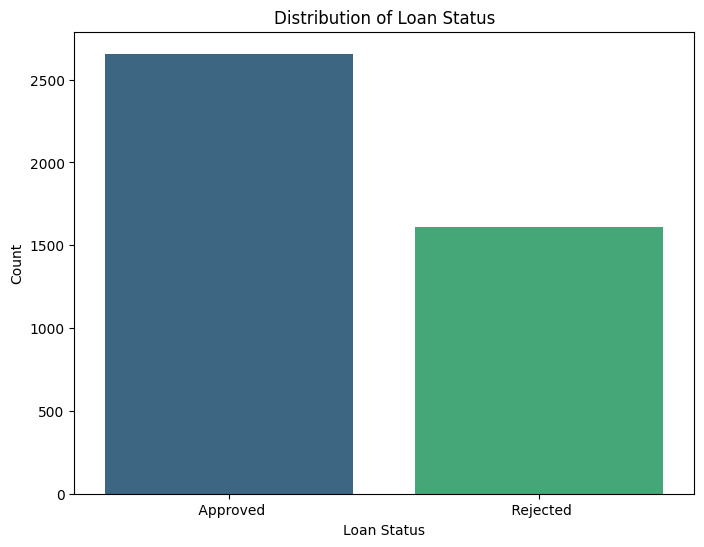

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip() # Ensure column names are clean

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
df.size

55497

In [23]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [7]:
df.columns = df.columns.str.strip()

In [25]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [26]:
df.columns = df.columns.str.strip()

In [8]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']
print(x.columns)

#in this
#y is what we want to predicts
#x is the data after we remove that target to avoid data leakage

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


In [9]:
#checking the missing values

df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [27]:
# train and test split

from sklearn.model_selection import train_test_split
# scikit - learn , it is one of the most popular python libraries for ML
# this train and test split is to avoid the data leakage

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )

# x_train - input data for training
# x_test - input data for testing
# y_train - correct answer for training
# y_test - correct answer for testing

# x_train + y_train - model learned
# x_test + y_test - model is evaluated

# stratify - like it make sure all classes are
# evenly represented in train and test split
# class total -
# pass - 90 fail - 10

# train and test split
# 90 and 10 for train and also for test , then we will implement stratify

In [28]:
x_train.shape

(3415, 12)

In [29]:
x_test.shape

# 4269 total row before splitting
# 854 is test x after splitting
# 854/4269= 0.20

(854, 12)

In [30]:
y_train.value_counts(normalize=True)

,proportion
loan_status,
Approved,0.622255
Rejected,0.377745


In [31]:
y_test.value_counts(normalize=True)

# 62 38

,proportion
loan_status,
Approved,0.62178
Rejected,0.37822


In [ ]:
# the topic we did are:
# modal framing
# target indetified
# featue-tarfile_extractall
# missing value check
# train test split using random state and stratify
# varified the split:
# x train shape , x test shape
# y train value , y test value

In [32]:
x_train.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [33]:
x_train = x_train.drop('loan_id', axis=1)
x_test = x_test.drop('loan_id', axis=1)
# loan id is just an identifier which has no meaning  , if we k
# it,the model may learn noise
# removing unnecessary columns from the modal train and test

In [18]:
x_train.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


In [34]:
import numpy as np
import pandas as pd

df = pd.read_csv('loan_approval_dataset.csv')
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [35]:
print(df[' loan_status'].value_counts())

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


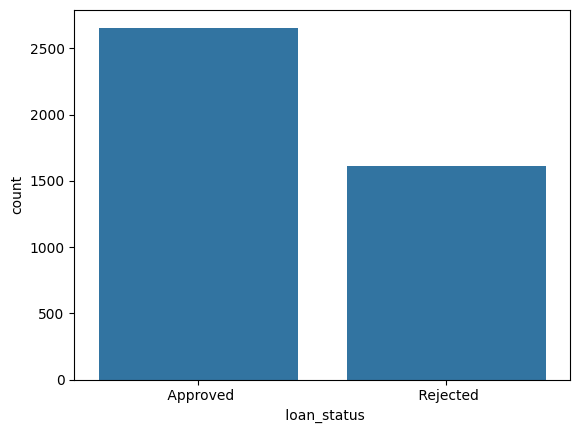

In [36]:
sns.countplot(x=" loan_status", data=df)
plt.show()

In [37]:
print(df.groupby(" education")[" loan_status"].value_counts(normalize=True))

 education     loan_status
Graduate      Approved        0.624534
              Rejected        0.375466
Not Graduate  Approved        0.619765
              Rejected        0.380235
Name: proportion, dtype: float64


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

df_enc = df.copy()
for col in df_enc.select_dtypes(include='object'):
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

X = df_enc.drop(" loan_status", axis=1)
y = df_enc[" loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

print(pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False))

 cibil_score                 0.801838
 loan_term                   0.061950
 loan_amount                 0.027927
 luxury_assets_value         0.016878
loan_id                      0.016761
 income_annum                0.016043
 residential_assets_value    0.015732
 bank_asset_value            0.015719
 commercial_assets_value     0.015258
 no_of_dependents            0.007455
 education                   0.002266
 self_employed               0.002172
dtype: float64
